
## Lab 1 z Podstaw Uczenia Maszynowego - Regresja Liniowa
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

#### Importowanie wszystkich potrzebnych bibliotek

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 1. Porównanie analitycznej i numerycznej implementacji regresji na syntetycznym zbiorze.
#### Zdefiniowanie zbiorów syntetycznych przy pomocy metody make_regression z parametrem 'noise' = 16 oraz wyświetlenie tych danych na wykresie

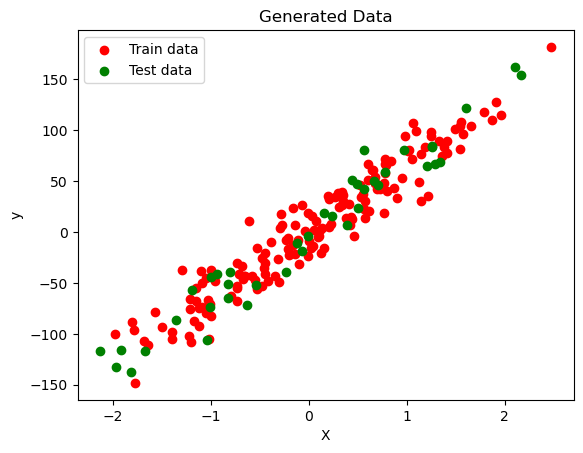

In [42]:
X, y = make_regression(n_samples=200, n_features=1, noise=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254397)
plt.scatter(X_train, y_train, color='red', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

#### Normalizacja danych treningowych i testowych względem zbioru treningowego

In [43]:
#Normalizacja
y_min = min(y_train)
y_max = max(y_train)
y_train = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_train]

y_test = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_test]

x_min = min(X_train)
x_max = max(X_train)
X_train = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_train])

X_test = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_test])

#### Zaimplementowanie analitycznej wersji regresji liniowej, obliczenie jej błędu średniokwadratowego oraz wyświetlenie wyników regresji

Czas metody analitycznej regresji liniowej: 0.0009255409240722656 s
Mean squared error: 0.0032067041944862395


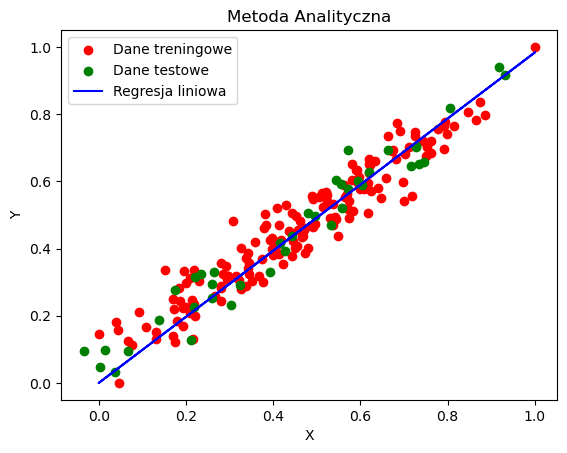

In [47]:
#Metoda analityczna
start = time.time()
theta = (np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
y_pred = X_train @ theta
y_pred_2 = X_test @ theta
mse1 = mean_squared_error(y_test, y_pred_2)
end = time.time()
print(f'Czas metody analitycznej regresji liniowej: {end - start} s')

#Wyswitlenie danych
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane testowe')
plt.plot(X_train, y_pred, color='blue', label='Regresja liniowa')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error: {mse1}')


#### Zaimplementowanie numerycznej wersji regresji liniowej (wykorzystując metode 'minimize' z parametrem method='Powell'), obliczenie jej błędu średniokwadratowego oraz wyświetlenie wyników regresji

Czas metody numerycznej regresji liniowej: 0.0019941329956054688 s
Mean squared error: 0.0032067041968211773


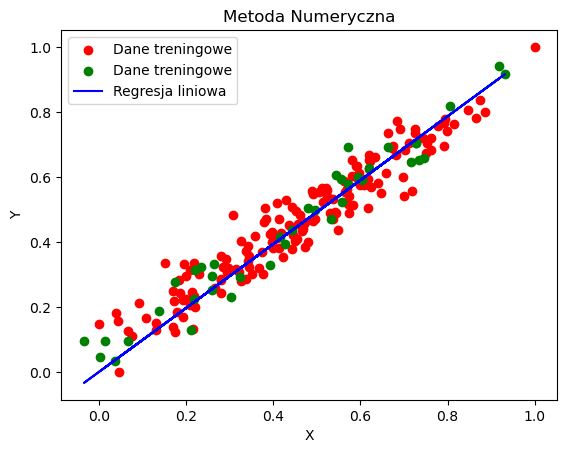

In [46]:
#Metoda numeryczna
def cost_function(teta, X, y):
    return 1/(len(X))*(y - X.T * teta) @ (y - X.T * teta).T
start = time.time()
result = minimize(cost_function, x0=0, args=(X_train, y_train), method='Powell')
coeff = result.x
y_pred_powell = X_train.dot(coeff)
y_pred2_powell = X_test.dot(coeff)
end = time.time()
print(f'Czas metody numerycznej regresji liniowej: {end - start} s')

mse2 = mean_squared_error(y_test, y_pred2_powell)
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.scatter(X_test, y_test, color='green', label='Dane treningowe')
plt.plot(X_test, y_pred2_powell, color='blue', label='Regresja liniowa')
plt.title('Metoda Numeryczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error: {mse2}')


### 2. Porównanie sklearn i analitycznej implementacji regresji na zbiorze FlaPy Bird z seedem '254397.
#### Wczytanie danych z plików csv i przypisanie ich do odpowiednich zmiennych

In [57]:
#Wczytywanie danych z danych z gry
column_names = ['X', 'y']
flapy_1 = pd.read_csv('last_autosave_1.csv', names=column_names)
flapy_2 = pd.read_csv('last_autosave_2.csv', names=column_names)
flapy_3 = pd.read_csv('last_autosave_3.csv', names=column_names)
X_1 = np.array(flapy_1['X']).reshape(-1,1)
y_1 = np.array(flapy_1['y']).reshape(-1,1)

X_2 = np.array(flapy_2['X']).reshape(-1,1)
y_2 = np.array(flapy_2['y']).reshape(-1,1)

X_3 = np.array(flapy_3['X']).reshape(-1,1)
y_3 = np.array(flapy_3['y']).reshape(-1,1)
Y_ = [y_1, y_2, y_3]
X_ = [X_1, X_2, X_3]

#### Wybranie 1 z 3 zbiorów za pomocą zmiennych X_chosen oraz Y_chosen a następnie ich normalizacja.

In [58]:
# X_chosen = X_[0]
# Y_chosen = Y_[0]

normalizer = MinMaxScaler()
X_1 = normalizer.fit_transform(X_1)
y_1 = normalizer.fit_transform(y_1)

X_2 = normalizer.fit_transform(X_2)
y_2 = normalizer.fit_transform(y_2)

X_3 = normalizer.fit_transform(X_3)
y_3 = normalizer.fit_transform(y_3)

# y_min = min(Y_chosen)
# y_max = max(Y_chosen)
# Y_chosen = [(y_comp - y_min) / (y_max - y_min) for y_comp in Y_chosen]


# x_min = min(X_chosen)
# x_max = max(X_chosen)
# X_chosen = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_chosen])

#### Wykorzystanie klasy  'PolynomialFeatures' do stworzenia macierzy cech składającej się ze wszystkich kombinacji wielomianowych cech o stopniu mniejszym lub równym określonemu stopniu.
#### Wykorzystanie tej macierzy do stworzenia regresji liniowej wielomianem 9 i 21 stopnia metodą analityczną oraz używając do tego funkcji z biblioteki sklearn.
#### Pierwszy zbiór

Czas metody sklearn dla n = 9: 0.0009968280792236328 s
Czas metody sklearn dla n = 21: 0.0011281967163085938 s
Czas metody analitycznej dla n = 9: 0.000990152359008789 s
Czas metody analitycznej dla n = 21: 0.0 s
Mean squared error for:
n = 9: 0.004377880438962696
n = 21: 16.11676604251759


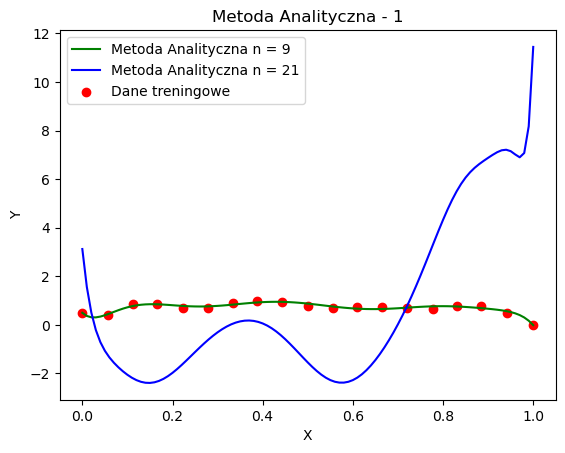

In [91]:
#Stworzenie macierzy cech składającej się ze wszystkich kombinacji wielomianowych cech o stopniu mniejszym lub równym określonemu stopniu.
poly_9_1 = PolynomialFeatures(9, include_bias=True)
poly_21_1 = PolynomialFeatures(21, include_bias=True)

XP_9_1 = poly_9_1.fit_transform(X_1)
XP_21_1 = poly_21_1.fit_transform(X_1)

#Stworzenie siatki punktow potrzebnych do plynnego wyswietlania wynikow modeli
X_plot_9 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_9 = poly_9_1.transform(X_plot_9)

X_plot_21 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_21 = poly_21_1.transform(X_plot_21)

#Obliczenie metody sklearn dla n = 9
start = time.time()
reg9 = LinearRegression()
reg9.fit(XP_9_1, y_1)
y_pred_9_1_linear_1 = reg9.predict(XP_plot_9)
y_pred_9_1_linear_mse = reg9.predict(XP_9_1)
mse9R = mean_squared_error(y_1, y_pred_9_1_linear_mse)
end = time.time()
print(f'Czas metody sklearn dla n = 9: {end - start} s')

#Obliczenie metody sklearn dla n = 21
start = time.time()
reg21 = LinearRegression()
reg21.fit(XP_21_1, y_1)
y_pred_21_1_linear_1 = reg21.predict(XP_plot_21)
y_pred_21_1_linear_mse = reg21.predict(XP_21_1)
mse21R = mean_squared_error(y_1, y_pred_21_1_linear_mse)
end = time.time()
print(f'Czas metody sklearn dla n = 21: {end - start} s')



#Obliczenie metody analitycznej dla n = 9
start = time.time()
theta_9_1 = np.linalg.inv(XP_9_1.T @ XP_9_1) @ XP_9_1.T @ y_1
y_pred_9_1 = XP_plot_9 @ theta_9_1
y_pred_9_1_mse = XP_9_1 @ theta_9_1
mse9 = mean_squared_error(y_1, y_pred_9_1_mse)
end = time.time()
print(f'Czas metody analitycznej dla n = 9: {end - start} s')

#Obliczenie metody analitycznej dla n = 21
start = time.time()
theta_21_1 = np.linalg.inv(XP_21_1.T @ XP_21_1) @ XP_21_1.T @ y_1
y_pred_21_1 = XP_plot_21 @ theta_21_1
y_pred_21_1_mse = XP_21_1 @ theta_21_1
mse21 = mean_squared_error(y_1, y_pred_21_1_mse)
end = time.time()
print(f'Czas metody analitycznej dla n = 21: {end - start} s')

#Wyswietlenie metody analitycznej
plt.plot(X_plot_9, y_pred_9_1, color='green', label='Metoda Analityczna n = 9')
plt.plot(X_plot_21, y_pred_21_1, color='blue', label='Metoda Analityczna n = 21')
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')
plt.title('Metoda Analityczna - 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error for:\nn = 9: {mse9}\nn = 21: {mse21}')

#### Drugi zbiór

Czas metody sklearn dla n = 9: 0.002990245819091797 s
Czas metody sklearn dla n = 21: 0.001993417739868164 s
Czas metody analitycznej dla n = 9: 0.0 s
Czas metody analitycznej dla n = 21: 0.0 s
Mean squared error for:
n = 9: 0.0046606787687177515
n = 21: 0.012967168799358672


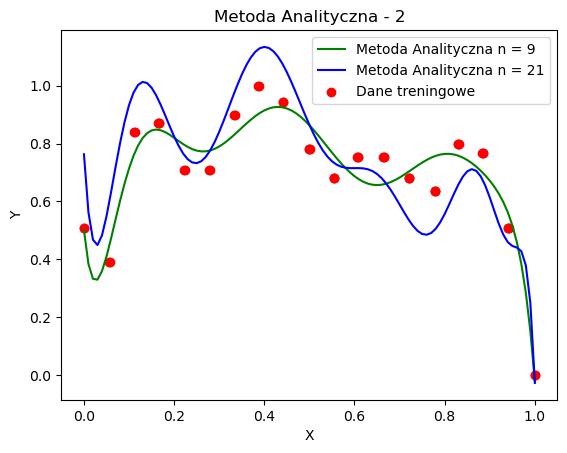

In [90]:
#Stworzenie macierzy cech składającej się ze wszystkich kombinacji wielomianowych cech o stopniu mniejszym lub równym określonemu stopniu.
poly_9_1 = PolynomialFeatures(9, include_bias=True)
poly_21_1 = PolynomialFeatures(21, include_bias=True)

XP_9_1 = poly_9_1.fit_transform(X_2)
XP_21_1 = poly_21_1.fit_transform(X_2)

#Stworzenie siatki punktow potrzebnych do plynnego wyswietlania wynikow modeli
X_plot_9 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_9 = poly_9_1.transform(X_plot_9)

X_plot_21 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_21 = poly_21_1.transform(X_plot_21)

#Obliczenie metody sklearn dla n = 9
start = time.time()
reg9 = LinearRegression()
reg9.fit(XP_9_1, y_2)
y_pred_9_1_linear_2 = reg9.predict(XP_plot_9)
y_pred_9_1_linear_mse = reg9.predict(XP_9_1)
mse9R = mean_squared_error(y_2, y_pred_9_1_linear_mse)
end = time.time()
print(f'Czas metody sklearn dla n = 9: {end - start} s')

#Obliczenie metody sklearn dla n = 21
start = time.time()
reg21 = LinearRegression()
reg21.fit(XP_21_1, y_2)
y_pred_21_1_linear_2 = reg21.predict(XP_plot_21)
y_pred_21_1_linear_mse = reg21.predict(XP_21_1)
mse21R = mean_squared_error(y_2, y_pred_21_1_linear_mse)
end = time.time()
print(f'Czas metody sklearn dla n = 21: {end - start} s')



#Obliczenie metody analitycznej dla n = 9
start = time.time()
theta_9_1 = np.linalg.inv(XP_9_1.T @ XP_9_1) @ XP_9_1.T @ y_2
y_pred_9_1 = XP_plot_9 @ theta_9_1
y_pred_9_1_mse = XP_9_1 @ theta_9_1
mse9 = mean_squared_error(y_2, y_pred_9_1_mse)
end = time.time()
print(f'Czas metody analitycznej dla n = 9: {end - start} s')

#Obliczenie metody analitycznej dla n = 21
start = time.time()
theta_21_1 = np.linalg.inv(XP_21_1.T @ XP_21_1) @ XP_21_1.T @ y_2
y_pred_21_1 = XP_plot_21 @ theta_21_1
y_pred_21_1_mse = XP_21_1 @ theta_21_1
mse21 = mean_squared_error(y_2, y_pred_21_1_mse)
end = time.time()
print(f'Czas metody analitycznej dla n = 21: {end - start} s')

#Wyswietlenie metody analitycznej
plt.plot(X_plot_9, y_pred_9_1, color='green', label='Metoda Analityczna n = 9')
plt.plot(X_plot_21, y_pred_21_1, color='blue', label='Metoda Analityczna n = 21')
plt.scatter(X_2, y_2, color='red', label='Dane treningowe')
plt.title('Metoda Analityczna - 2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error for:\nn = 9: {mse9}\nn = 21: {mse21}')

#### Trzeci zbiór

Czas metody sklearn dla n = 9: 0.0019931793212890625 s
Czas metody sklearn dla n = 21: 0.01694321632385254 s
Czas metody analitycznej dla n = 9: 0.0 s
Czas metody analitycznej dla n = 21: 0.002990245819091797 s
Mean squared error for:
n = 9: 0.008741554875223528
n = 21: 0.02974751437964451


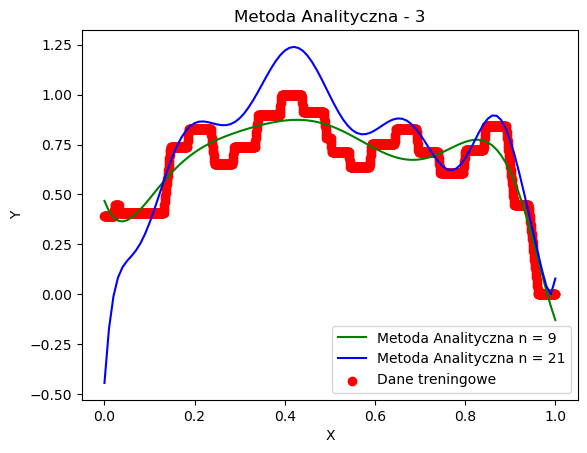

In [89]:
#Stworzenie macierzy cech składającej się ze wszystkich kombinacji wielomianowych cech o stopniu mniejszym lub równym określonemu stopniu.
poly_9_1 = PolynomialFeatures(9, include_bias=True)
poly_21_1 = PolynomialFeatures(21, include_bias=True)

XP_9_1 = poly_9_1.fit_transform(X_3)
XP_21_1 = poly_21_1.fit_transform(X_3)

#Stworzenie siatki punktow potrzebnych do plynnego wyswietlania wynikow modeli
X_plot_9 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_9 = poly_9_1.transform(X_plot_9)

X_plot_21 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_21 = poly_21_1.transform(X_plot_21)

#Obliczenie metody sklearn dla n = 9
start = time.time()
reg9 = LinearRegression()
reg9.fit(XP_9_1, y_3)
y_pred_9_1_linear_3 = reg9.predict(XP_plot_9)
y_pred_9_1_linear_mse = reg9.predict(XP_9_1)
mse9R = mean_squared_error(y_3, y_pred_9_1_linear_mse)
end = time.time()
print(f'Czas metody sklearn dla n = 9: {end - start} s')

#Obliczenie metody sklearn dla n = 21
start = time.time()
reg21 = LinearRegression()
reg21.fit(XP_21_1, y_3)
y_pred_21_1_linear_3 = reg21.predict(XP_plot_21)
y_pred_21_1_linear_mse = reg21.predict(XP_21_1)
mse21R = mean_squared_error(y_3, y_pred_21_1_linear_mse)
end = time.time()
print(f'Czas metody sklearn dla n = 21: {end - start} s')



#Obliczenie metody analitycznej dla n = 9
start = time.time()
theta_9_1 = np.linalg.inv(XP_9_1.T @ XP_9_1) @ XP_9_1.T @ y_3
y_pred_9_1 = XP_plot_9 @ theta_9_1
y_pred_9_1_mse = XP_9_1 @ theta_9_1
mse9 = mean_squared_error(y_3, y_pred_9_1_mse)
end = time.time()
print(f'Czas metody analitycznej dla n = 9: {end - start} s')

#Obliczenie metody analitycznej dla n = 21
start = time.time()
theta_21_1 = np.linalg.inv(XP_21_1.T @ XP_21_1) @ XP_21_1.T @ y_3
y_pred_21_1 = XP_plot_21 @ theta_21_1
y_pred_21_1_mse = XP_21_1 @ theta_21_1
mse21 = mean_squared_error(y_3, y_pred_21_1_mse)
end = time.time()
print(f'Czas metody analitycznej dla n = 21: {end - start} s')

#Wyswietlenie metody analitycznej
plt.plot(X_plot_9, y_pred_9_1, color='green', label='Metoda Analityczna n = 9')
plt.plot(X_plot_21, y_pred_21_1, color='blue', label='Metoda Analityczna n = 21')
plt.scatter(X_3, y_3, color='red', label='Dane treningowe')
plt.title('Metoda Analityczna - 3')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error for:\nn = 9: {mse9}\nn = 21: {mse21}')

#### Wyświetlenie metody sklearn na wykresie
#### Pierwszy zbiór

Mean squared error for:
SKlearn method n = 9: 0.008741554796450921
SKlearn method n = 21: 0.0014661239085997089


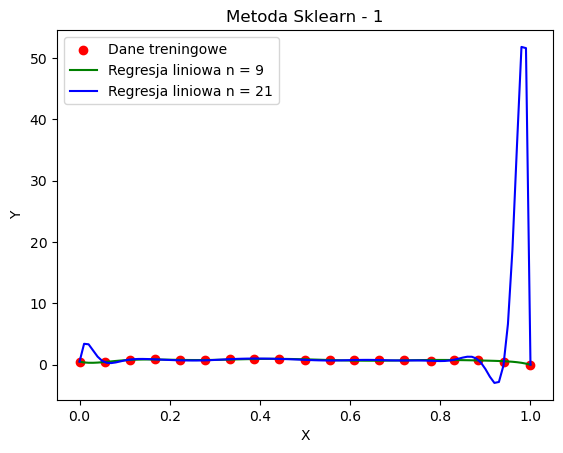

In [88]:
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')

plt.plot(X_plot_9, y_pred_9_1_linear_1, color='green', label='Regresja liniowa n = 9')
plt.plot(X_plot_21, y_pred_21_1_linear_1, color='blue', label='Regresja liniowa n = 21')
plt.title('Metoda Sklearn - 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error for:\nSKlearn method n = 9: {mse9R}\nSKlearn method n = 21: {mse21R}')

#### Drugi zbiór

Mean squared error for:
SKlearn method n = 9: 0.008741554796450921
SKlearn method n = 21: 0.0014661239085997089


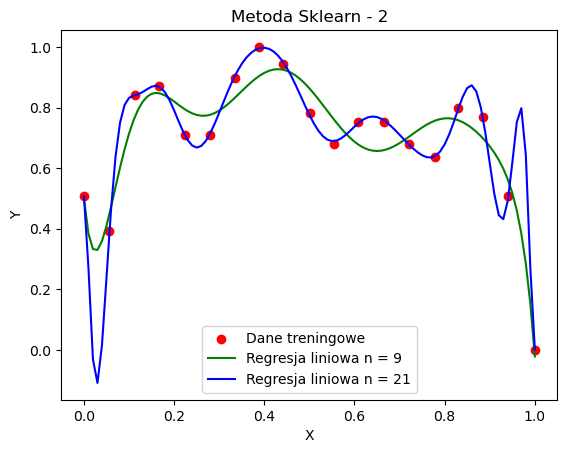

In [87]:
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')

plt.plot(X_plot_9, y_pred_9_1_linear_2, color='green', label='Regresja liniowa n = 9')
plt.plot(X_plot_21, y_pred_21_1_linear_2, color='blue', label='Regresja liniowa n = 21')
plt.title('Metoda Sklearn - 2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error for:\nSKlearn method n = 9: {mse9R}\nSKlearn method n = 21: {mse21R}')

#### Trzeci zbiór

Mean squared error for:
SKlearn method n = 9: 0.008741554796450921
SKlearn method n = 21: 0.0014661239085997089


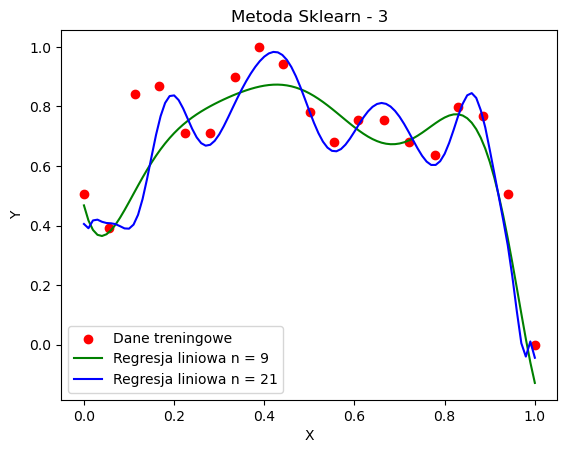

In [86]:
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')

plt.plot(X_plot_9, y_pred_9_1_linear_3, color='green', label='Regresja liniowa n = 9')
plt.plot(X_plot_21, y_pred_21_1_linear_3, color='blue', label='Regresja liniowa n = 21')
plt.title('Metoda Sklearn - 3')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Mean squared error for:\nSKlearn method n = 9: {mse9R}\nSKlearn method n = 21: {mse21R}')

### 3. Porównanie sklearn i wlasnej implementacji ridge regression na zbiorze FlapPy Bird.
#### Implementacja wygląda tak samo jak w poprzednim podpunkcie z jedną zmianą w postaci dodania macierzy diagonalnej pomnożonej przez lambda.
#### Następnie wykorzystanie klasy Ridge do stworzenia modelu przy pomocy biblioteki sklearn.
#### Pierwszy zbiór

Czas metody analitycznej Ridge dla n = 16: 0.0 s
Czas metody sklearn Ridge dla n = 16: 0.0019931793212890625 s
Mean squared error for:
SKlearn Ridge method n = 16: 5.305817027052984e-05
Analytical Tichnow n = 16: 0.0004381289955441579


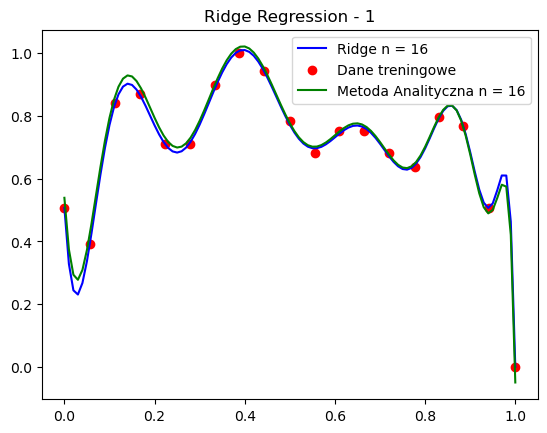

In [85]:
poly_16_1 = PolynomialFeatures(16, include_bias=True)
XP_16_1 = poly_16_1.fit_transform(X_1)


X_plot_16 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_16 = poly_16_1.transform(X_plot_16)


# Dla duzej ilosci danych wejsciowych
# lambda_16 = 0.0000000000000001
# I = np.eye(len(XP_16_1.T @ XP_16_1))

# Dla malej ilosci danych wejsciowych
lambda_16 = 100
I = np.ones_like((XP_16_1.T @ XP_16_1))

#Metoda analityczna z dodaniem macierzy diagonalnej
start = time.time()
theta_16_1 = np.linalg.inv(XP_16_1.T @ XP_16_1 + lambda_16 * I) @ XP_16_1.T @ y_1
y_pred_16_1 = XP_plot_16 @ theta_16_1
y_pred_16_1_mse = XP_16_1 @ theta_16_1
mse16 = mean_squared_error(y_1, y_pred_16_1_mse)
end = time.time()
print(f'Czas metody analitycznej Ridge dla n = 16: {end - start} s')


#Metoda sklearn
start = time.time()
ridge = Ridge(alpha=0.0000000000000001)
# ridge = Ridge(alpha=0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
ridge.fit(XP_16_1, y_1)
y_pred_ridge_mse = ridge.predict(XP_16_1)
y_pred_ridge= ridge.predict(XP_plot_16)
mse16R = mean_squared_error(y_1, y_pred_ridge_mse)
end = time.time()
print(f'Czas metody sklearn Ridge dla n = 16: {end - start} s')


#Wyswietlenie wynikow modeli
plt.plot(X_plot_16, y_pred_ridge, color='blue', label='Ridge n = 16')
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')
plt.plot(X_plot_16, y_pred_16_1, color='green', label='Metoda Analityczna n = 16')
plt.legend()
plt.title('Ridge Regression - 1')
print(f'Mean squared error for:\nSKlearn Ridge method n = 16: {mse16R}\nAnalytical Tichnow n = 16: {mse16}')


#### Drugi zbiór

Czas metody analitycznej Ridge dla n = 16: 0.0 s
Czas metody sklearn Ridge dla n = 16: 0.0009965896606445312 s
Mean squared error for:
SKlearn Ridge method n = 16: 9.349473144290055e-05
Analytical Tichnow n = 16: 0.0004643182107674702


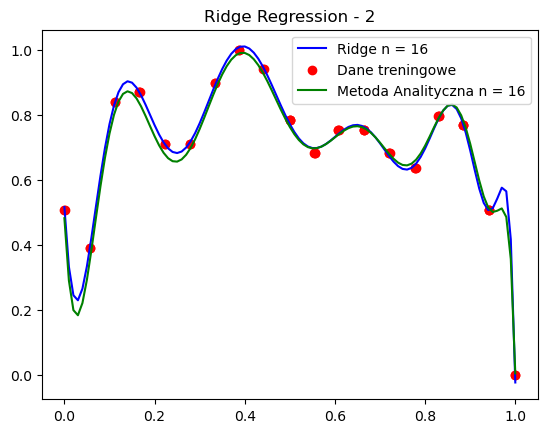

In [84]:
poly_16_1 = PolynomialFeatures(16, include_bias=True)
XP_16_1 = poly_16_1.fit_transform(X_2)


X_plot_16 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_16 = poly_16_1.transform(X_plot_16)


# Dla duzej ilosci danych wejsciowych
# lambda_16 = 0.0000000000000001
# I = np.eye(len(XP_16_1.T @ XP_16_1))

# Dla malej ilosci danych wejsciowych
lambda_16 = 100
I = np.ones_like((XP_16_1.T @ XP_16_1))

#Metoda analityczna z dodaniem macierzy diagonalnej
start = time.time()
theta_16_1 = np.linalg.inv(XP_16_1.T @ XP_16_1 + lambda_16 * I) @ XP_16_1.T @ y_2
y_pred_16_1 = XP_plot_16 @ theta_16_1
y_pred_16_1_mse = XP_16_1 @ theta_16_1
mse16 = mean_squared_error(y_2, y_pred_16_1_mse)
end = time.time()
print(f'Czas metody analitycznej Ridge dla n = 16: {end - start} s')


#Metoda sklearn
start = time.time()
ridge = Ridge(alpha=0.0000000000000001)
ridge.fit(XP_16_1, y_2)
y_pred_ridge_mse = ridge.predict(XP_16_1)
y_pred_ridge= ridge.predict(XP_plot_16)
mse16R = mean_squared_error(y_2, y_pred_ridge_mse)
end = time.time()
print(f'Czas metody sklearn Ridge dla n = 16: {end - start} s')


#Wyswietlenie wynikow modeli
plt.plot(X_plot_16, y_pred_ridge, color='blue', label='Ridge n = 16')
plt.scatter(X_2, y_2, color='red', label='Dane treningowe')
plt.plot(X_plot_16, y_pred_16_1, color='green', label='Metoda Analityczna n = 16')
plt.legend()
plt.title('Ridge Regression - 2')
print(f'Mean squared error for:\nSKlearn Ridge method n = 16: {mse16R}\nAnalytical Tichnow n = 16: {mse16}')


#### Trzeci zbiór

Czas metody analitycznej Ridge dla n = 16: 0.0009965896606445312 s
Czas metody sklearn Ridge dla n = 16: 0.003000497817993164 s
Mean squared error for:
SKlearn Ridge method n = 16: 0.0018960616340082843
Analytical Tichnow n = 16: 0.0060680426624587416


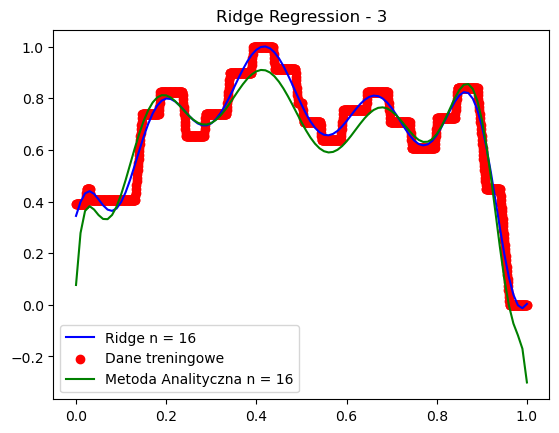

In [83]:
poly_16_1 = PolynomialFeatures(16, include_bias=True)
XP_16_1 = poly_16_1.fit_transform(X_3)


X_plot_16 = np.linspace(0, 1, 101).reshape(-1,1)
XP_plot_16 = poly_16_1.transform(X_plot_16)


# Dla duzej ilosci danych wejsciowych
lambda_16 = 0.0000000000000001
I = np.eye(len(XP_16_1.T @ XP_16_1))

# Dla malej ilosci danych wejsciowych
# lambda_16 = 100
# I = np.ones_like((XP_16_1.T @ XP_16_1))

#Metoda analityczna z dodaniem macierzy diagonalnej
start = time.time()
theta_16_1 = np.linalg.inv(XP_16_1.T @ XP_16_1 + lambda_16 * I) @ XP_16_1.T @ y_3
y_pred_16_1 = XP_plot_16 @ theta_16_1
y_pred_16_1_mse = XP_16_1 @ theta_16_1
mse16 = mean_squared_error(y_3, y_pred_16_1_mse)
end = time.time()
print(f'Czas metody analitycznej Ridge dla n = 16: {end - start} s')


#Metoda sklearn
start = time.time()
ridge = Ridge(alpha=0.0000000000000001)
# ridge = Ridge(alpha=0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000001)
ridge.fit(XP_16_1, y_3)
y_pred_ridge_mse = ridge.predict(XP_16_1)
y_pred_ridge= ridge.predict(XP_plot_16)
mse16R = mean_squared_error(y_3, y_pred_ridge_mse)
end = time.time()
print(f'Czas metody sklearn Ridge dla n = 16: {end - start} s')


#Wyswietlenie wynikow modeli
plt.plot(X_plot_16, y_pred_ridge, color='blue', label='Ridge n = 16')
plt.scatter(X_3, y_3, color='red', label='Dane treningowe')
plt.plot(X_plot_16, y_pred_16_1, color='green', label='Metoda Analityczna n = 16')
plt.legend()
plt.title('Ridge Regression - 3')
print(f'Mean squared error for:\nSKlearn Ridge method n = 16: {mse16R}\nAnalytical Tichnow n = 16: {mse16}')
